In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import specplotlib
from tqdm import tqdm_notebook as tqdm

In [2]:
X_SG = numpy.load('X_SG.npy')
CW = numpy.load('CW.npy')
sn_spec_time = numpy.load('sn_spec_time.npy')
nof_objects = X_SG.shape[0]
SN_df_w_salt_w_class = pandas.read_csv('good_df.csv')
SN_df_w_salt_w_class.head()

,idx,SN,zhel_spec,tmax(B)_spec,tmax(B)_err_spec,ref_spec,Dm15_spec,Dm15_err_spec,ref1_spec,M_B_spec,...,z_cmb_salt,z_err_salt,m_B_salt,m_B_err_salt,s_salt,s_err_salt,c_salt,c_err_salt,mu_salt,mu_err_salt
0,0,1994D,0.0029,49432.5,0.1,"B,M,SA,SN",1.37,0.03,B,-99.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1994M,0.0232,49474.5,0.9,"B,M,SA,SN",1.26,0.06,B,-19.21,...,0.024,0.001,16.30,0.159,0.78,0.02,0.11,0.02,35.207,0.205
2,2,1994S,0.0151,49518.3,0.3,"B,M,SA,SN",0.94,0.06,B,-19.55,...,0.015,0.001,14.77,0.196,1.09,0.05,-0.01,0.02,34.372,0.280
3,3,1994T,0.0346,49514.4,0.4,"M,SN",1.51,0.08,SN,-99.99,...,0.036,0.001,17.05,0.084,0.84,0.04,0.02,0.05,36.264,0.181
4,4,1994ae,0.0043,49685.5,0.8,"B,M,SA,SN",0.96,0.04,B,-99.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
SN_df_w_salt_w_class.columns

Index(['idx', 'SN', 'zhel_spec', 'tmax(B)_spec', 'tmax(B)_err_spec',
       'ref_spec', 'Dm15_spec', 'Dm15_err_spec', 'ref1_spec', 'M_B_spec',
       'M_B_err_spec', 'B-V_spec', 'B-V_err_spec', 'Bm-Vm_spec',
       'Bm-Vm_err_spec', 'Phot_ref_spec', 'ref..2', 'n_spec', 'RA', 'DEC',
       'z_CMB', 'z_CMB_salt2_err', 'm_B_salt2', 'm_B_salt2_err', 'x_1_salt2',
       'x_1_salt2_err', 'c_salt2', 'c_salt2_err', 'mu_salt2', 'mu_salt2_err',
       'EW5972_spec', 'EW6355_spec', 'v6355_spec', 'Phase_spec', 'BClass_spec',
       'WClass_spec', 'SNIa_salt', 'z_cmb_salt', 'z_err_salt', 'm_B_salt',
       'm_B_err_salt', 's_salt', 's_err_salt', 'c_salt', 'c_err_salt',
       'mu_salt', 'mu_err_salt'],
      dtype='object')

In [4]:
def get_norm_X(X):
    nof_object = X.shape[0]
    for i in range(nof_objects):
        X[i] = X[i]/numpy.median(X[i])
    return X

def get_all_X(X_orig):
    
    X_list = []
    
    #s = 350
    #e = X_orig.shape[1] - 100
    #X_list += [get_norm_X(X_orig[:,s:e])]
    
    s = 1740
    e = 2350
    X_list += [get_norm_X(X_orig[:,s:e])]

    s = 1380
    e = 1800
    X_list += [get_norm_X(X_orig[:,s:e])]
    
    s = 1000
    e = 1470
    X_list += [get_norm_X(X_orig[:,s:e])]
    
    s = 500
    e = 1000
    X_list += [get_norm_X(X_orig[:,s:e])]
    
    s = 350
    e = 750
    X_list += [get_norm_X(X_orig[:,s:e])]
    
    s = 700
    e = 900
    X_list += [get_norm_X(X_orig[:,s:e])]
    
    s = 2000
    e = 2350
    X_list += [get_norm_X(X_orig[:,s:e])]
    
    return X_list

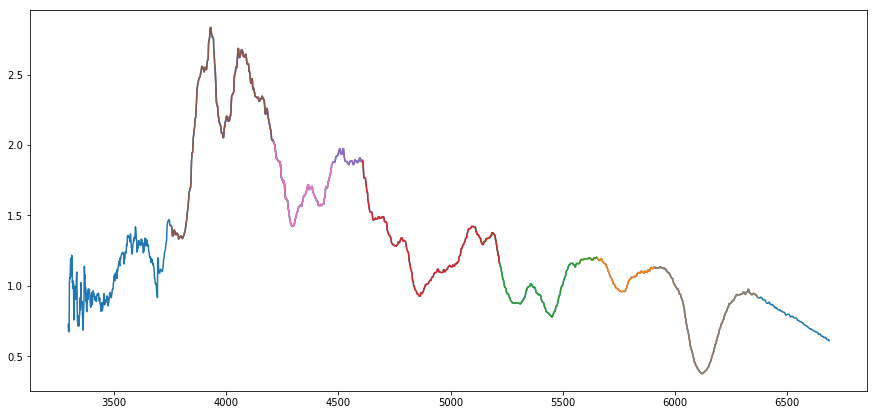

In [5]:
plt.figure(figsize = (15,7))
plt.plot(CW, X_SG[0])

s = 1740
e = 2350
plt.plot(CW[s:e], X_SG[0,s:e])

s = 1380
e = 1800
plt.plot(CW[s:e], X_SG[0,s:e])

s = 1000
e = 1470
plt.plot(CW[s:e], X_SG[0,s:e])

s = 500
e = 1000
plt.plot(CW[s:e], X_SG[0,s:e])

s = 350
e = 750
plt.plot(CW[s:e], X_SG[0,s:e])

s = 700
e = 900
plt.plot(CW[s:e], X_SG[0,s:e])

s = 2000
e = 2350
plt.plot(CW[s:e], X_SG[0,s:e])

plt.show()

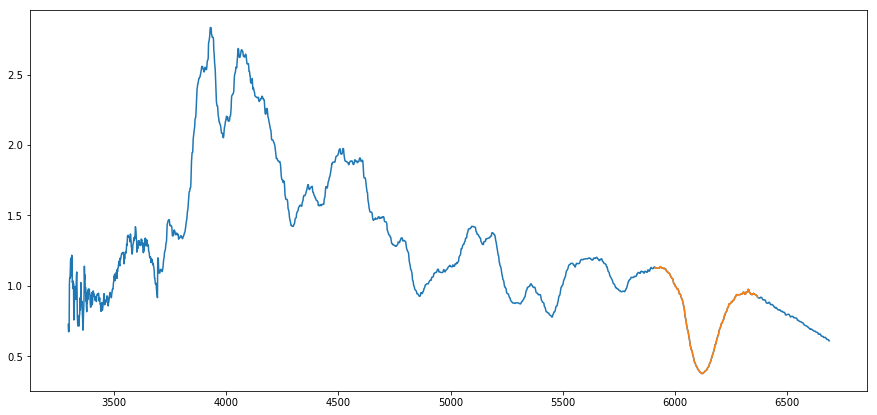

In [6]:
plt.figure(figsize = (15,7))
plt.plot(CW, X_SG[0])



s = 1380
e = 1800

s = 2000
e = 2350
X = X_SG[:,s:e].copy()
wave = CW[s:e].copy()


plt.plot(wave, X[0])



plt.show()

In [22]:
Xall = get_all_X(X_SG)

print(len(Xall))
for X in Xall:
    print(X.shape)

7
(229, 610)
(229, 420)
(229, 470)
(229, 500)
(229, 400)
(229, 200)
(229, 350)


In [23]:
import distances
from tqdm import trange
dmat_list = []
for i in trange(len(Xall)):
    for j in range(i,len(Xall)):
        if i != j:
            dmat_list += [distances.rf_distance_matrix(X=[Xall[i], Xall[j]],n_trees=100, max_depth = 6, s_type='f')]

100%|██████████| 7/7 [00:18<00:00,  2.66s/it]


In [24]:
nof_objects = X_SG.shape[0]
multi_d_array = numpy.zeros([len(dmat_list), nof_objects, nof_objects])
for i in range(len(dmat_list)):
    d = dmat_list[i]
    multi_d_array[i] = d/numpy.median(d)
multi_d_array.shape

(21, 229, 229)

In [59]:
d_fin = numpy.sort(multi_d_array, axis = 0)[2,:,:]
#d_fin = numpy.sum(multi_d_array, axis = 0)
d_fin.shape

(229, 229)

In [7]:
#X_norm = X.copy()
X_norm = get_norm_X(X)

In [29]:
from importlib import reload
reload(specplotlib)

<module 'specplotlib' from '/Users/itamar/git/astro/SNIa/specplotlib.py'>

/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


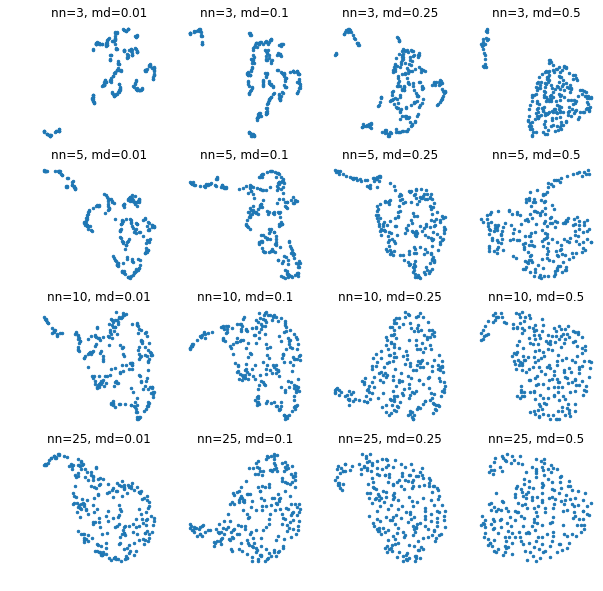

In [60]:
#specplotlib.umap_param_scan(X_norm)
specplotlib.umap_param_scan(d_fin, metric='precomputed')

In [63]:
import umap

#s_umap = umap.UMAP(n_neighbors=10, 
#                      min_dist=0.01).fit_transform(X_norm)

s_umap = umap.UMAP(n_neighbors=10, metric='precomputed',
                      min_dist=0.1).fit_transform(d_fin)

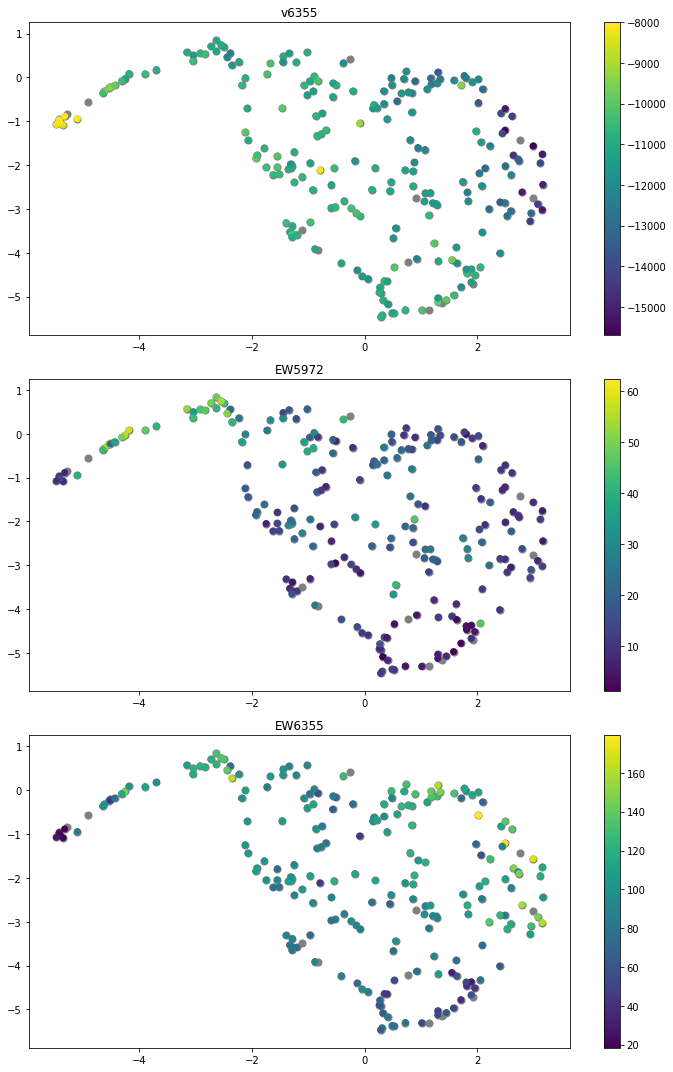

In [64]:
reload(specplotlib)
specplotlib.embedding_plot_spec_meas(s_umap, SN_df_w_salt_w_class)

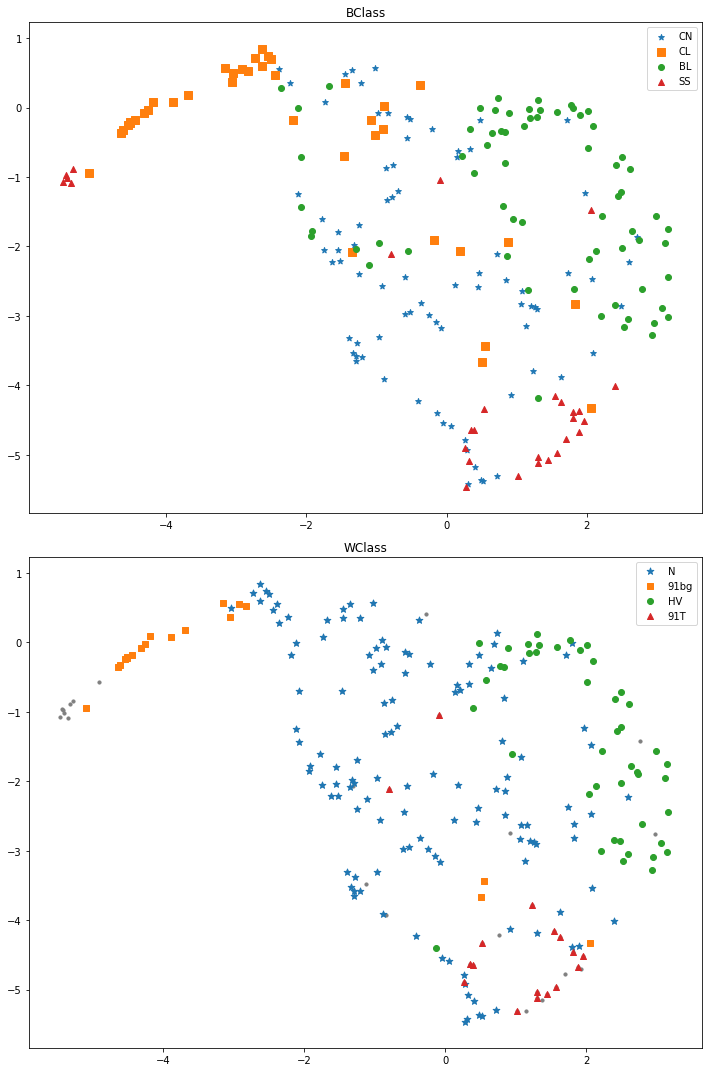

In [65]:
reload(specplotlib)
specplotlib.embedding_plot_groups(s_umap, SN_df_w_salt_w_class)

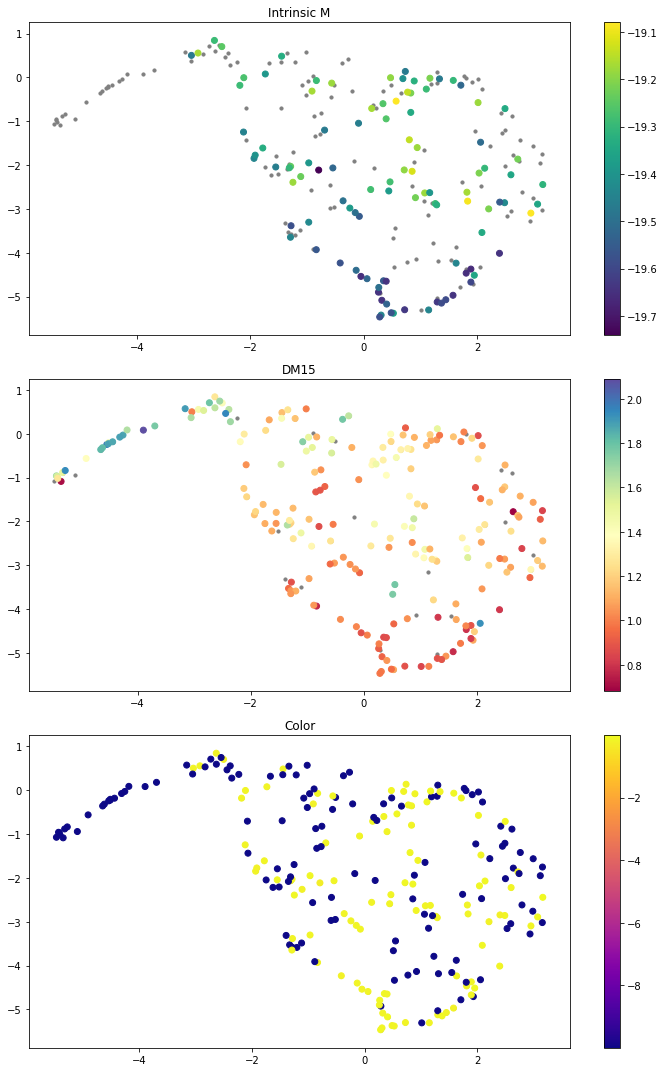

In [66]:
reload(specplotlib)
specplotlib.embedding_plot_lc_params(s_umap, SN_df_w_salt_w_class)

/Users/itamar/git/astro/SNIa/specplotlib.py:278: RuntimeWarning: invalid value encountered in less
  t[t < cut] = numpy.nan


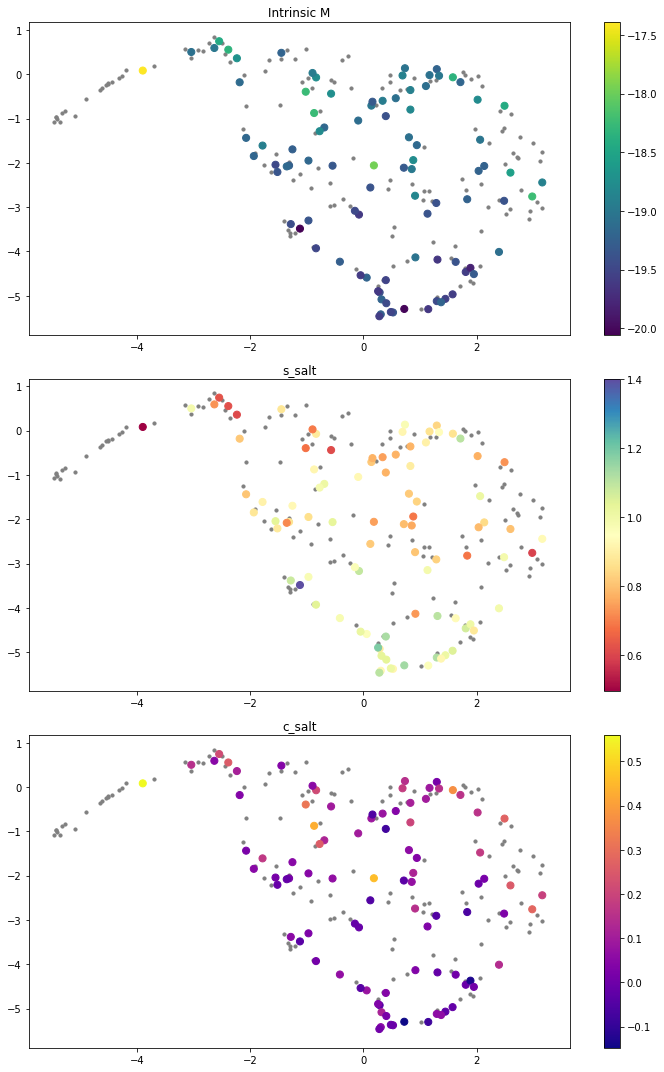

In [67]:
reload(specplotlib)
specplotlib.embedding_plot_salt_lc_params(s_umap, SN_df_w_salt_w_class)

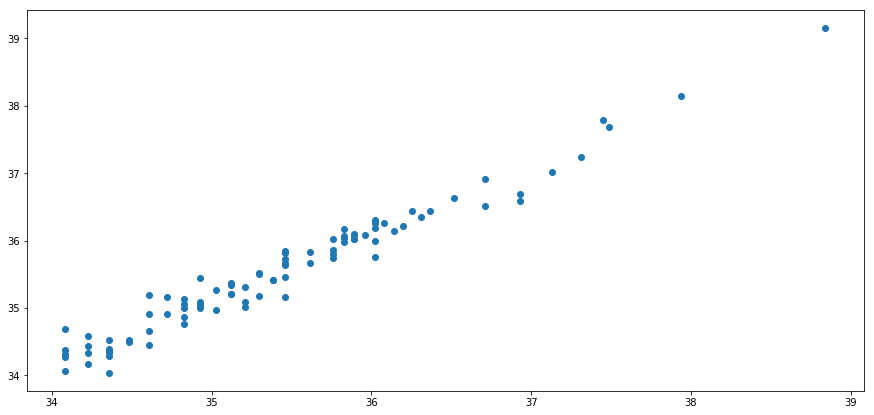

In [76]:
# the different distance moduli we have
from astropy.cosmology import WMAP9 as cosmo

z_CMB_distmod = cosmo.distmod(SN_df_w_salt_w_class['z_cmb_salt'].values)
z_hel_distmod = cosmo.distmod(SN_df_w_salt_w_class['zhel_spec'].values)

mu = SN_df_w_salt_w_class['mu_salt'].values
plt.figure(figsize=(15,7))
plt.scatter(z_CMB_distmod, mu)
#plt.scatter(z_CMB_distmod, z_hel_distmod)
plt.show()

In [42]:
SN_df_w_salt_w_class.columns

Index(['idx', 'SN', 'zhel_spec', 'tmax(B)_spec', 'tmax(B)_err_spec',
       'ref_spec', 'Dm15_spec', 'Dm15_err_spec', 'ref1_spec', 'M_B_spec',
       'M_B_err_spec', 'B-V_spec', 'B-V_err_spec', 'Bm-Vm_spec',
       'Bm-Vm_err_spec', 'Phot_ref_spec', 'ref..2', 'n_spec', 'RA', 'DEC',
       'z_CMB', 'z_CMB_salt2_err', 'm_B_salt2', 'm_B_salt2_err', 'x_1_salt2',
       'x_1_salt2_err', 'c_salt2', 'c_salt2_err', 'mu_salt2', 'mu_salt2_err',
       'EW5972_spec', 'EW6355_spec', 'v6355_spec', 'Phase_spec', 'BClass_spec',
       'WClass_spec', 'SNIa_salt', 'z_cmb_salt', 'z_err_salt', 'm_B_salt',
       'm_B_err_salt', 's_salt', 's_err_salt', 'c_salt', 'c_err_salt',
       'mu_salt', 'mu_err_salt'],
      dtype='object')

In [48]:
from scipy import optimize

def func(z, *p):
    m0, a, b = z
    x, dx, y, dy = p
    chi2 = (m0 + x[:,0]*a + x[:,1]*b - y)**2
    chi2 = chi2/( (dx[:,0]*a)**2 + (dx[:,1]*b)**2 + dy**2 )
    return numpy.sum(chi2)



def lin_fit(x, dx, y, dy):
    p = (x, dx, y, dy)
    rranges = (slice(19, 19.5, 0.01), slice(0, 0.2, 0.01), slice(-3, -1.5, 0.05))
    resbrute = optimize.brute(func, rranges, args=p, full_output=True, finish=optimize.fmin)
    
    return resbrute[0]

def plot_groups(gs, X, dX, Y, dY):
    
    plt.figure(figsize=(15,12))
    y_plt = Y.copy()
    dy_plt = dY.copy()

    plt.subplot(211)
    x_plt = X[:,0].copy()
    dx_plt = dX[:,0].copy()
    plt.errorbar(x=x_plt, y=y_plt, yerr=dy_plt, xerr=dx_plt, c='gray', alpha = 0.5,  fmt='o')
    for g in gs:
        plt.errorbar(x=x_plt[g], y=y_plt[g], yerr=dy_plt[g], xerr=dx_plt[g],  fmt='o')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel(r'$s_salt$', fontsize = 20)
    plt.ylabel(r'$m_B intrinsic$', fontsize = 20)

    plt.subplot(212)
    x_plt = X[:,1].copy()
    dx_plt = dX[:,1].copy()
    plt.errorbar(x=x_plt, y=y_plt, yerr=dy_plt, xerr=dx_plt, c='gray', alpha = 0.5,  fmt='o')
    for g in gs:
        plt.errorbar(x=x_plt[g], y=y_plt[g], yerr=dy_plt[g], xerr=dx_plt[g],  fmt='o')
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.xlabel(r'$c_salt$', fontsize = 20)
    plt.ylabel(r'$m_B intrinsic$', fontsize = 20)
    
    plt.tight_layout()
    plt.show()
    
    return
    

def group_fit(g, X, dX, Y, dY, flag_plot = True, flag_color = 'default'):
    
    x_ = X[g].copy()
    dx_ = dX[g].copy()
    y_ = Y[g].copy()
    dy_ = dY[g].copy()
    res = lin_fit(x_, dx_, y_, dy_)
    
    if flag_plot:
        
        
        plt.figure(figsize=(15,12))
        y_plt = Y.copy()
        dy_plt = dY.copy()
        
        plt.subplot(211)
        x_plt = X[:,0].copy()
        dx_plt = dX[:,0].copy()
        plt.errorbar(x=x_plt, y=y_plt, yerr=dy_plt, xerr=dx_plt, c='gray', alpha = 0.5,  fmt='o')
        if flag_color != 'default' :
            plt.errorbar(x=x_plt[g], y=y_plt[g], yerr=dy_plt[g], xerr=dx_plt[g],  fmt='o', c = flag_color)
        
        plt.subplot(212)
        x_plt = X[:,1].copy()
        dx_plt = dX[:,1].copy()
        plt.errorbar(x=x_plt, y=y_plt, yerr=dy_plt, xerr=dx_plt, c='gray', alpha = 0.5,  fmt='o')
        if flag_color != 'default' :
            plt.errorbar(x=x_plt[g], y=y_plt[g], yerr=dy_plt[g], xerr=dx_plt[g],  fmt='o', c = flag_color)
        plt.show()
        
    
    return res

In [45]:
SN_df_w_salt_w_class.columns

Index(['idx', 'SN', 'zhel_spec', 'tmax(B)_spec', 'tmax(B)_err_spec',
       'ref_spec', 'Dm15_spec', 'Dm15_err_spec', 'ref1_spec', 'M_B_spec',
       'M_B_err_spec', 'B-V_spec', 'B-V_err_spec', 'Bm-Vm_spec',
       'Bm-Vm_err_spec', 'Phot_ref_spec', 'ref..2', 'n_spec', 'RA', 'DEC',
       'z_CMB', 'z_CMB_salt2_err', 'm_B_salt2', 'm_B_salt2_err', 'x_1_salt2',
       'x_1_salt2_err', 'c_salt2', 'c_salt2_err', 'mu_salt2', 'mu_salt2_err',
       'EW5972_spec', 'EW6355_spec', 'v6355_spec', 'Phase_spec', 'BClass_spec',
       'WClass_spec', 'SNIa_salt', 'z_cmb_salt', 'z_err_salt', 'm_B_salt',
       'm_B_err_salt', 's_salt', 's_err_salt', 'c_salt', 'c_err_salt',
       'mu_salt', 'mu_err_salt'],
      dtype='object')

In [80]:
has_m_b = numpy.where(  (numpy.isfinite(SN_df_w_salt_w_class['s_salt'].values)))[0]

Y = z_hel_distmod.value  - SN_df_w_salt_w_class['m_B_salt'].values.copy()
X = numpy.vstack([SN_df_w_salt_w_class['s_salt'].values, SN_df_w_salt_w_class['c_salt'].values]).T

dY = numpy.sqrt(SN_df_w_salt_w_class['mu_err_salt'].values.copy()**2  + SN_df_w_salt_w_class['m_B_err_salt'].values.copy()**2)
dX = numpy.vstack([SN_df_w_salt_w_class['s_err_salt'].values, SN_df_w_salt_w_class['c_err_salt'].values]).T


Yf = Y[has_m_b].copy()
Xf = X[has_m_b].copy()
dYf = dY[has_m_b].copy()
dXf = dX[has_m_b].copy()

from sklearn.metrics.pairwise import euclidean_distances
d_umap = euclidean_distances(s_umap, s_umap)

alpha = numpy.ones(nof_objects)*numpy.nan
beta = numpy.ones(nof_objects)*numpy.nan
m0 = numpy.ones(nof_objects)*numpy.nan

nnn = 8
has_m_b_dmat = d_umap[has_m_b,:][:,has_m_b].copy()
has_m_b_dmat_asort = numpy.argsort(has_m_b_dmat, axis = 1)[:,:nnn]

for i in tqdm(range(len(has_m_b))):
    g                 = has_m_b_dmat_asort[i]
    inter, a, b       = group_fit(g, Xf, dXf, Yf, dYf, flag_plot=False)
    alpha[has_m_b[i]] = a
    beta[has_m_b[i]]  = b
    m0[has_m_b[i]]    = inter

/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less


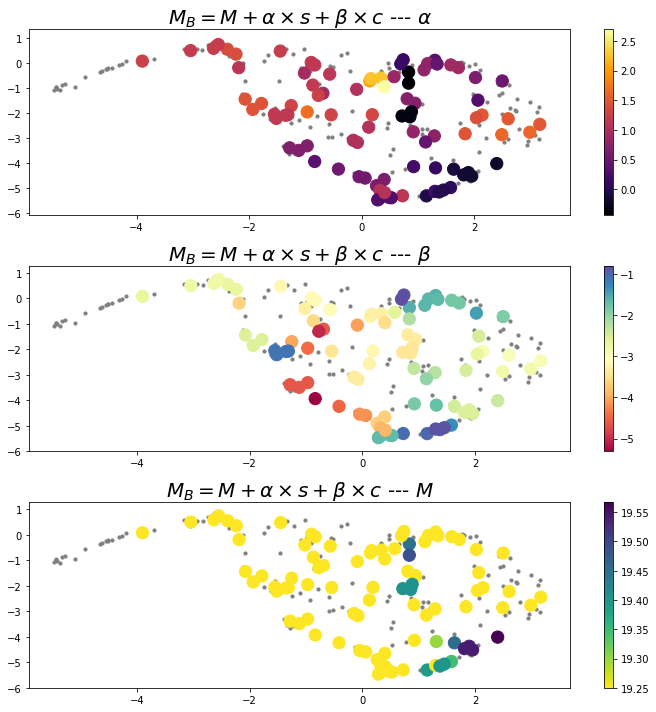

In [75]:
x = s_umap[:, 0]
y = s_umap[:, 1]

plt.figure(figsize=(10,10))


plt.subplot(311)
plt.title(r'$M_{B} = M + \alpha \times s + \beta \times c$ --- $\alpha$', fontsize = 20 )

plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = alpha.copy()
#t = SN_df_w_salt_w_class['c'].values.copy()
#cut = 0.2
#t[t > cut] = cut
plt.scatter(x, y, c = t, cmap = 'inferno', s = 150)
plt.colorbar()
plt.tight_layout()

plt.subplot(312)
plt.title(r'$M_{B} = M + \alpha \times s + \beta \times c$ --- $\beta$', fontsize = 20 )


plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = beta.copy()
#cut = 6
#t[t < cut] = cut
#cut = 0.2
#t[t > cut] = cut
plt.scatter(x, y, c = t, cmap = 'Spectral', s = 150)
plt.colorbar()

plt.subplot(313)
plt.title(r'$M_{B} = M + \alpha \times s + \beta \times c$ --- $M$', fontsize = 20 )

plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = m0.copy()
#cut = 6
#t[t < cut] = cut
cut = 19.25
t[t < cut] = cut
plt.scatter(x, y, c = t, cmap = 'viridis_r', s = 150)

plt.colorbar()
plt.tight_layout()
plt.show()

/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less


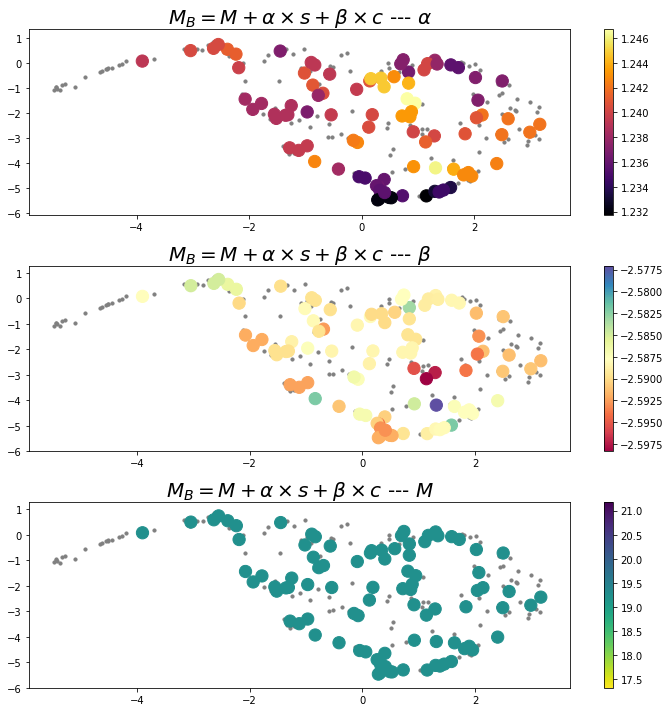

In [78]:
x = s_umap[:, 0]
y = s_umap[:, 1]

plt.figure(figsize=(10,10))


plt.subplot(311)
plt.title(r'$M_{B} = M + \alpha \times s + \beta \times c$ --- $\alpha$', fontsize = 20 )

plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = alpha.copy()
#t = SN_df_w_salt_w_class['c'].values.copy()
#cut = 0.2
#t[t > cut] = cut
plt.scatter(x, y, c = t, cmap = 'inferno', s = 150)
plt.colorbar()
plt.tight_layout()

plt.subplot(312)
plt.title(r'$M_{B} = M + \alpha \times s + \beta \times c$ --- $\beta$', fontsize = 20 )


plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = beta.copy()
#cut = 6
#t[t < cut] = cut
#cut = 0.2
#t[t > cut] = cut
plt.scatter(x, y, c = t, cmap = 'Spectral', s = 150)
plt.colorbar()

plt.subplot(313)
plt.title(r'$M_{B} = M + \alpha \times s + \beta \times c$ --- $M$', fontsize = 20 )

plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = m0.copy()
#cut = 6
#t[t < cut] = cut
cut = 19.25
t[t < cut] = cut
plt.scatter(x, y, c = t, cmap = 'viridis_r', s = 150)

plt.colorbar()
plt.tight_layout()
plt.show()

/Users/itamar/anaconda2/envs/mangos/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in less


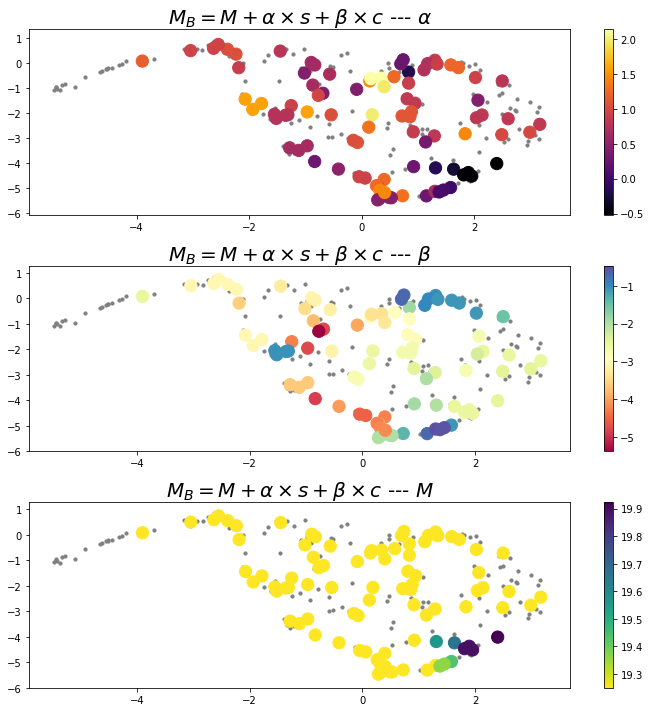

In [81]:
x = s_umap[:, 0]
y = s_umap[:, 1]

plt.figure(figsize=(10,10))


plt.subplot(311)
plt.title(r'$M_{B} = M + \alpha \times s + \beta \times c$ --- $\alpha$', fontsize = 20 )

plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = alpha.copy()
#t = SN_df_w_salt_w_class['c'].values.copy()
#cut = 0.2
#t[t > cut] = cut
plt.scatter(x, y, c = t, cmap = 'inferno', s = 150)
plt.colorbar()
plt.tight_layout()

plt.subplot(312)
plt.title(r'$M_{B} = M + \alpha \times s + \beta \times c$ --- $\beta$', fontsize = 20 )


plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = beta.copy()
#cut = 6
#t[t < cut] = cut
#cut = 0.2
#t[t > cut] = cut
plt.scatter(x, y, c = t, cmap = 'Spectral', s = 150)
plt.colorbar()

plt.subplot(313)
plt.title(r'$M_{B} = M + \alpha \times s + \beta \times c$ --- $M$', fontsize = 20 )

plt.scatter(x, y, color = 'gray', s = 10)
#plt.scatter(x[iax_in_df_idx], y[iax_in_df_idx], color ='orange', s= 200, marker='*')
#plt.scatter(x, y, c = t)
t = m0.copy()
#cut = 6
#t[t < cut] = cut
cut = 19.25
t[t < cut] = cut
plt.scatter(x, y, c = t, cmap = 'viridis_r', s = 150)

plt.colorbar()
plt.tight_layout()
plt.show()

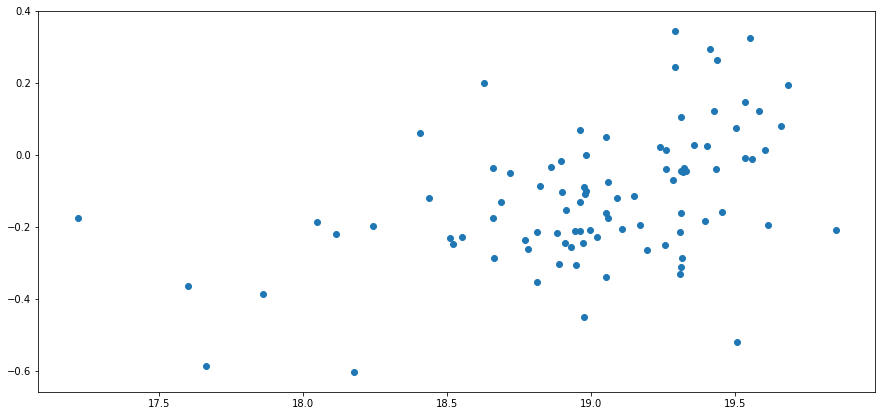

In [86]:
Y1 = z_hel_distmod.value  - SN_df_w_salt_w_class['m_B_salt'].values.copy()
Y2 = z_CMB_distmod.value  - SN_df_w_salt_w_class['m_B_salt'].values.copy()
Y3 = SN_df_w_salt_w_class['mu_salt'].values.copy()  - SN_df_w_salt_w_class['m_B_salt'].values.copy()



plt.figure(figsize=(15,7))
plt.scatter(Y2, Y2 - Y3)
#plt.scatter(z_CMB_distmod, z_hel_distmod)
plt.show()

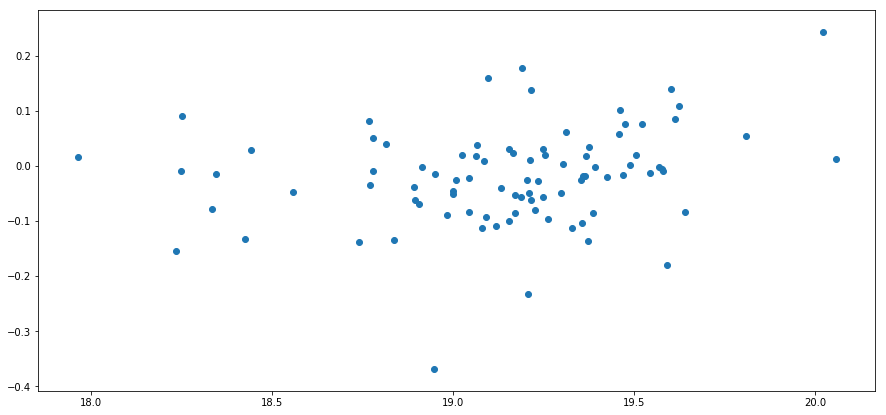

In [88]:
Y4 = SN_df_w_salt_w_class['mu_salt'].values.copy()  - SN_df_w_salt_w_class['mu_salt2'].values.copy()
plt.figure(figsize=(15,7))
plt.scatter(Y3, Y4)
#plt.scatter(z_CMB_distmod, z_hel_distmod)
plt.show()